# Lab 3 : Trees and Forests

## G3 SDI - Machine Learning

In this lab, we will use decision trees and random forests for a classification problem, using the implementations provided by `scikit-learn`. More precisely, we are going to use a famous dataset : Fisher's iris (so famous that is has a Wikipedia page, see [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)).

### Instructions
* Rename your notebook with your surnames as `lab3_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI Farah, MILANO Olivia, 22/10/2025.
</div>

In [1]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

### Exercise 1 - Decision trees

**Q1.** Load the dataset using the proposed function. This will load the data into a dictionary-like structure (use `.keys()` to check its elements).

Then store the features into a variable X, and the class into a variable y.

What is this dataset about ? How many features do we have ? How many examples ?

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()

X = np.array(iris.data)
y = np.array(iris.target)

print("=" * 60)
print("IRIS DATASET INFORMATION")
print("=" * 60)
print(f"🔹 Keys in dataset: {list(iris.keys())}")
print(f"🔹 Feature names: {', '.join(iris.feature_names)}")
print(f"🔹 Dataset shape (examples, features): {X.shape}")
print(f"🔹 Target shape: {y.shape}")
print(f"🔹 Target classes: {list(iris.target_names)}")


IRIS DATASET INFORMATION
🔹 Keys in dataset: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
🔹 Feature names: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
🔹 Dataset shape (examples, features): (150, 4)
🔹 Target shape: (150,)
🔹 Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
This dataset contains measurements of iris flowers from 3 species (setosa, versicolor, virginica).
Each of the 150 examples has 4 features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm).
</div>

**Q2.** Split the dataset into a training set and a test set (80/20).

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


**Q3.** Fit a decision tree to the training set, and plot the resulting tree using the `plot_tree` function (add feature names and class names for readability).

Explain how to interpret the tree.

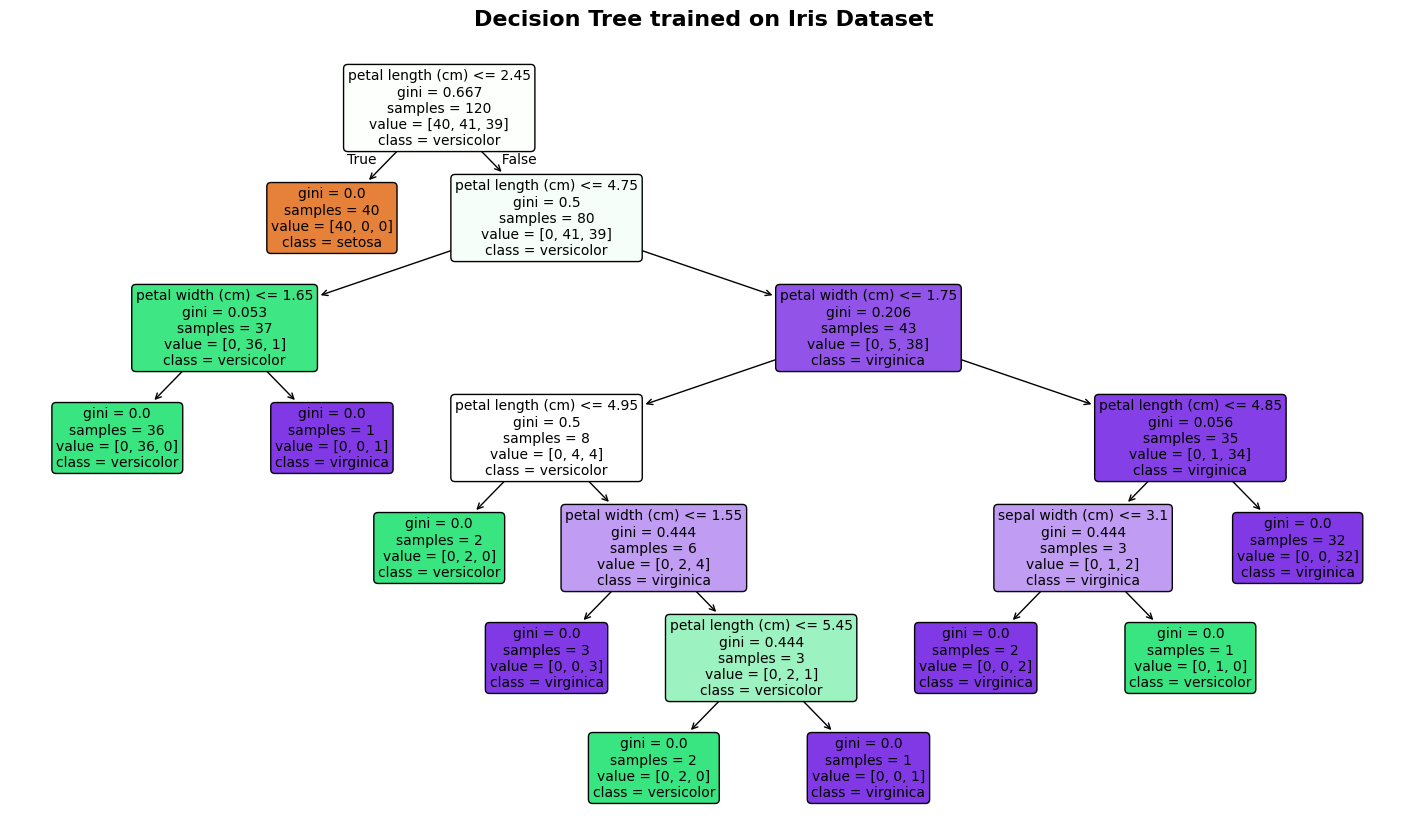

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(18, 10))  # Large figure for readability
plot_tree(
    clf,
    filled=True,             
    rounded=True,             
    feature_names=iris.feature_names,  
    class_names=iris.target_names,     
    fontsize=10,             
)
plt.title("Decision Tree trained on Iris Dataset ", fontsize=16, fontweight='bold', pad=20)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">


  <h2 style="text-align:center; margin-bottom:0.3rem;">Interpretation of the Decision Tree</h2>

  <p style="margin-top:0.3rem;">
    Each <strong>node</strong> in the decision tree represents a rule or condition based on one of the dataset’s features. 
    The tree is read <strong>from top to bottom</strong>: starting from the root node, one follows the branches 
    according to whether the condition is <em>True</em> or <em>False</em>, until reaching a leaf node that provides the final class prediction.
  </p>

  <h3 style="margin-bottom:0.3rem;">Information contained in each node</h3>
  <ul>
    <li><strong>Condition:</strong> e.g., <code>petal length (cm) &lt;= 2.45</code> — the decision rule used to split the data at that node.</li>
    <li><strong>Gini:</strong> the impurity index. A value of 0 indicates a pure node (all samples belong to the same class), 
        while higher values indicate a mixture of classes.</li>
    <li><strong>Samples:</strong> the number of training examples that reached this node.</li>
    <li><strong>Value:</strong> the distribution of samples across the classes, e.g., [setosa, versicolor, virginica].</li>
    <li><strong>Class:</strong> the predicted class, corresponding to the majority of samples in the node.</li>
  </ul>

  <h3 style="margin-bottom:0.3rem;">Example of reading a decision path</h3>
  <ol>
    <li>Start at the root node, where the first condition is tested (e.g., <code>petal length &lt;= 2.45</code>).</li>
    <li>If the condition is <strong>true</strong>, follow the left branch. If the node reached is pure, 
        the corresponding class (e.g., <em>Setosa</em>) is predicted.</li>
    <li>If the condition is <strong>false</strong>, follow the right branch and evaluate the next condition 
        (e.g., <code>petal width &lt;= 1.75</code>), and so on, until a leaf node is reached.</li>
  </ol>

  <h3 style="margin-bottom:0.3rem;">General interpretation (Iris dataset)</h3>
  <p>
    The decision tree mainly relies on thresholds applied to <em>petal length</em> and <em>petal width</em> 
    (and to a lesser extent, <em>sepal length</em> and <em>sepal width</em>) to distinguish the three species of Iris flowers. 
    For instance:
  </p>
  <ul>
    <li><strong>Petal length ≤ 2.45 cm</strong> → typically classified as <em>Setosa</em>.</li>
    <li><strong>Intermediate petal length</strong> combined with <strong>small petal width</strong> → generally <em>Versicolor</em>.</li>
    <li><strong>Larger petal dimensions</strong> → usually <em>Virginica</em>.</li>
  </ul>

  <h3 style="margin-bottom:0.3rem;">Interpreting purity and impurity</h3>
  <p>
    A <strong>pure node (Gini = 0)</strong> means that all samples in that node belong to the same class, 
    indicating a locally very reliable prediction.  
    Conversely, a <strong>high Gini value</strong> indicates that multiple classes are mixed within that node, 
    suggesting that the model could not find a perfectly clean separation based on the available features.
  </p>



 <p>
    In summary, the decision tree provides a clear, hierarchical view of how the model distinguishes between 
    the three Iris species based on measurable flower characteristics. It highlights the most discriminative features 
    and the thresholds that best separate the different classes
</p>
  
</div>

**Q4**. Check the performance of the decision tree on the test set.

Accuracy of the Decision Tree: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



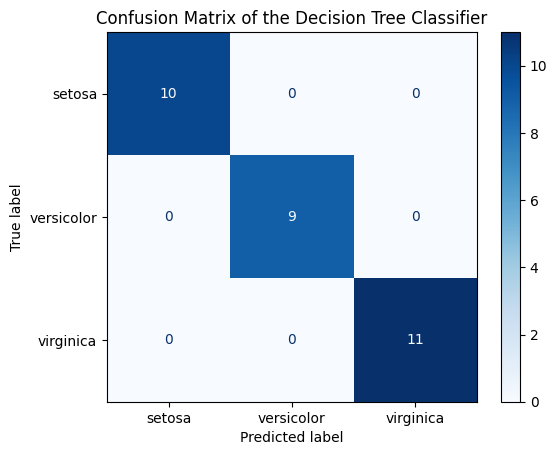

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of the Decision Tree Classifier")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
The Decision Tree achieved an <strong>accuracy of 100%</strong>, with perfect precision, recall, and F1-scores for all classes. 
    
This indicates that the model correctly classified every sample in the test set. 

Such performance is expected on the Iris dataset, which is small and well-separated. However, the perfect score may also suggest potential 
<strong>overfitting</strong>, so further validation or pruning could be considered for more complex datasets.
</div>

**Q5.** Now train two other decision trees, using only the petal features for the first one, and the sepal features for the other one.

In both cases, display the tree, and the decision regions (with the training set points). Also check their performance on the test set. Comment.

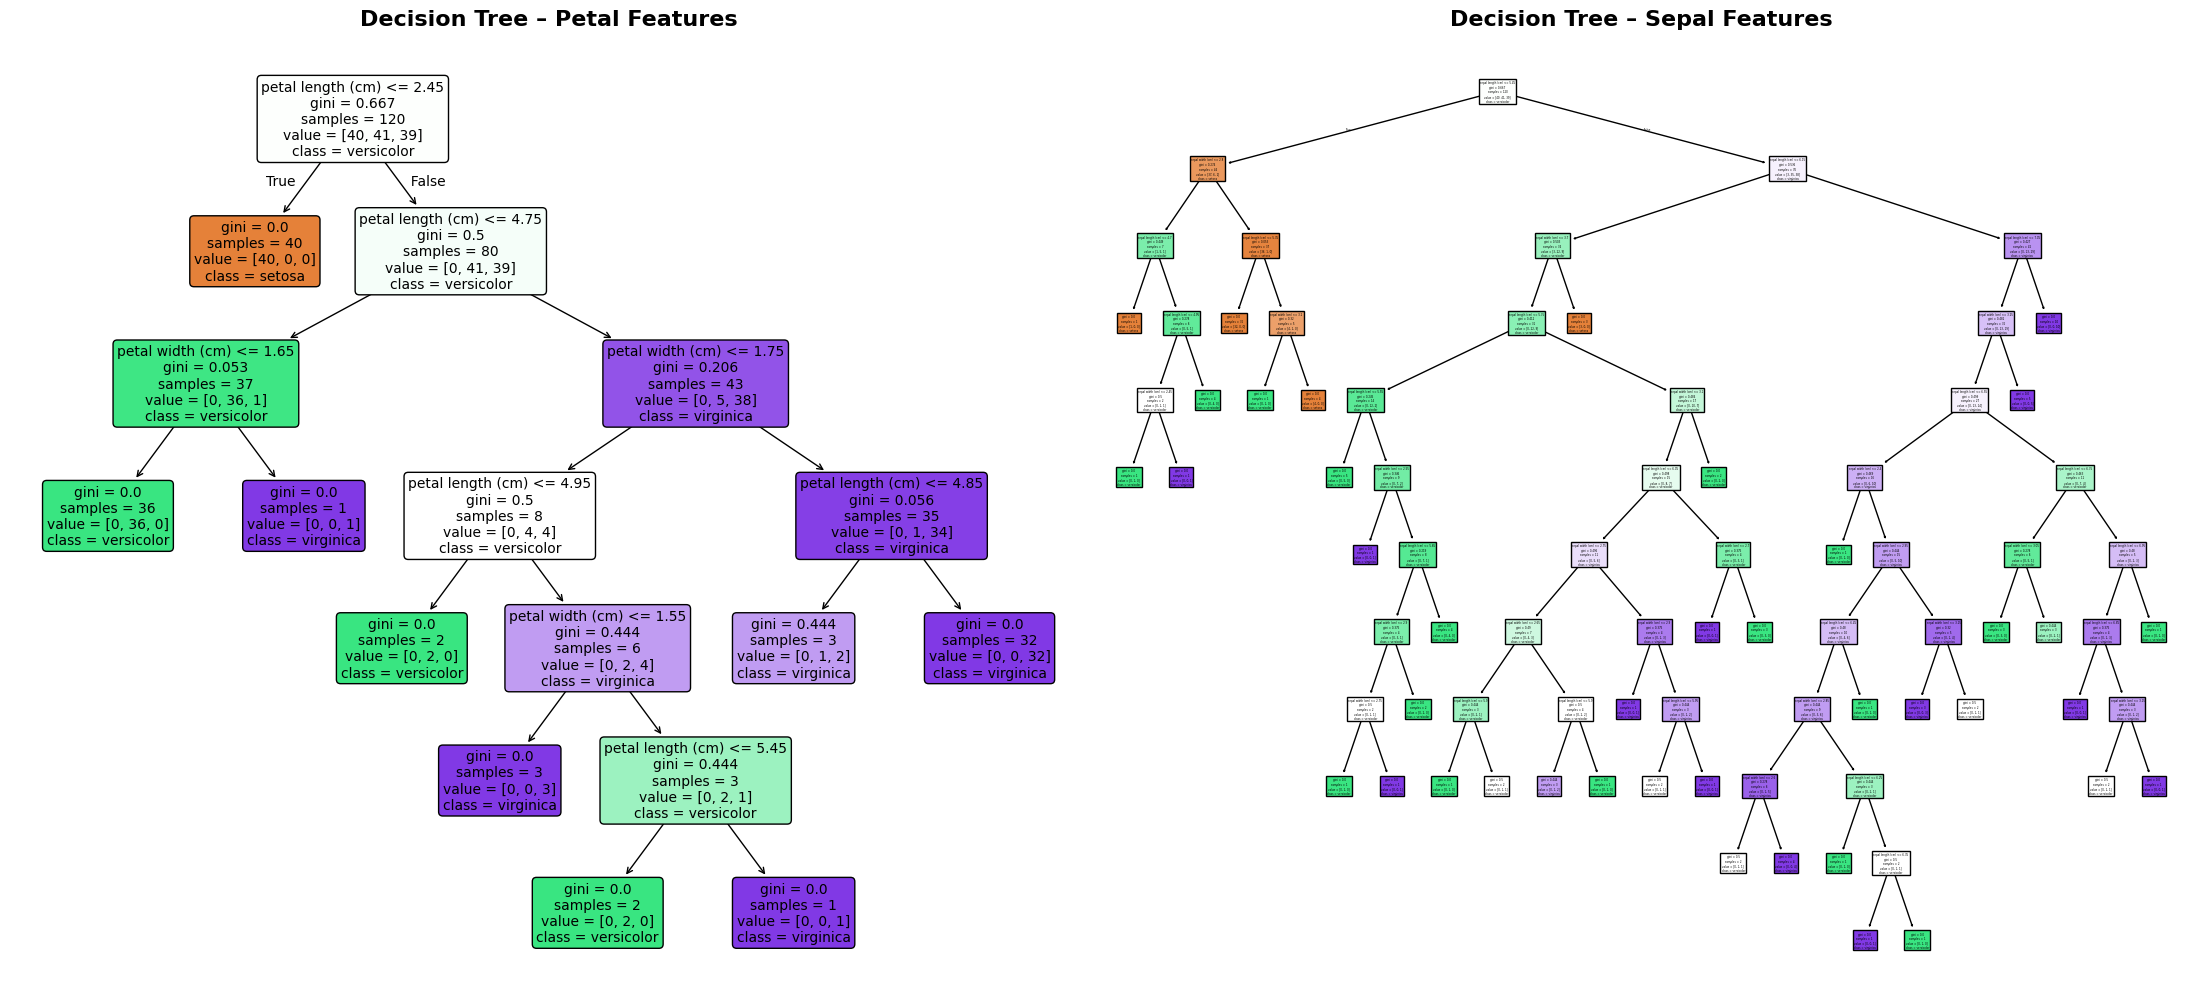

In [36]:
# Data
X_train_petal = X_train[:, 2:]
X_train_sepal = X_train[:, :2]
X_test_petal = X_test[:, 2:]
X_test_sepal = X_test[:, :2]

clf_petal = DecisionTreeClassifier(random_state=42)
clf_petal.fit(X_train_petal, y_train)

clf_sepal = DecisionTreeClassifier(random_state=42)
clf_sepal.fit(X_train_sepal, y_train)

fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# --- Left: Tree trained on petal features ---
plot_tree(
    clf_petal,
    ax=axes[0],
    filled=True,
    rounded=True,
    feature_names=iris.feature_names[2:],  # Petal features
    class_names=iris.target_names,
    fontsize=10
)
axes[0].set_title("Decision Tree – Petal Features", fontsize=16, fontweight='bold', pad=20)

# --- Right: Tree trained on sepal features ---
plot_tree(
    clf_sepal,
    ax=axes[1],
    filled=True,
    # rounded=True,
    feature_names=iris.feature_names[:2],  # Sepal features
    class_names=iris.target_names,
    # fontsize=10
)
axes[1].set_title("Decision Tree – Sepal Features", fontsize=16, fontweight='bold', pad=20)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q6.** Check carefully the documentation for `DecisionTreeClassifier`, and explain how a decision tree could be regularized. What method from the lecture is not covered by scikit-learn ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

### Exercice 2 - Random forests

**Q1.** Now train a random forest on the whole dataset, using 200 trees, and setting the maximum depth of each tree to 3. Also add `oob_score = True`.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


**Q2.** Extract 5 differents trees from the forest and display them. Comment.

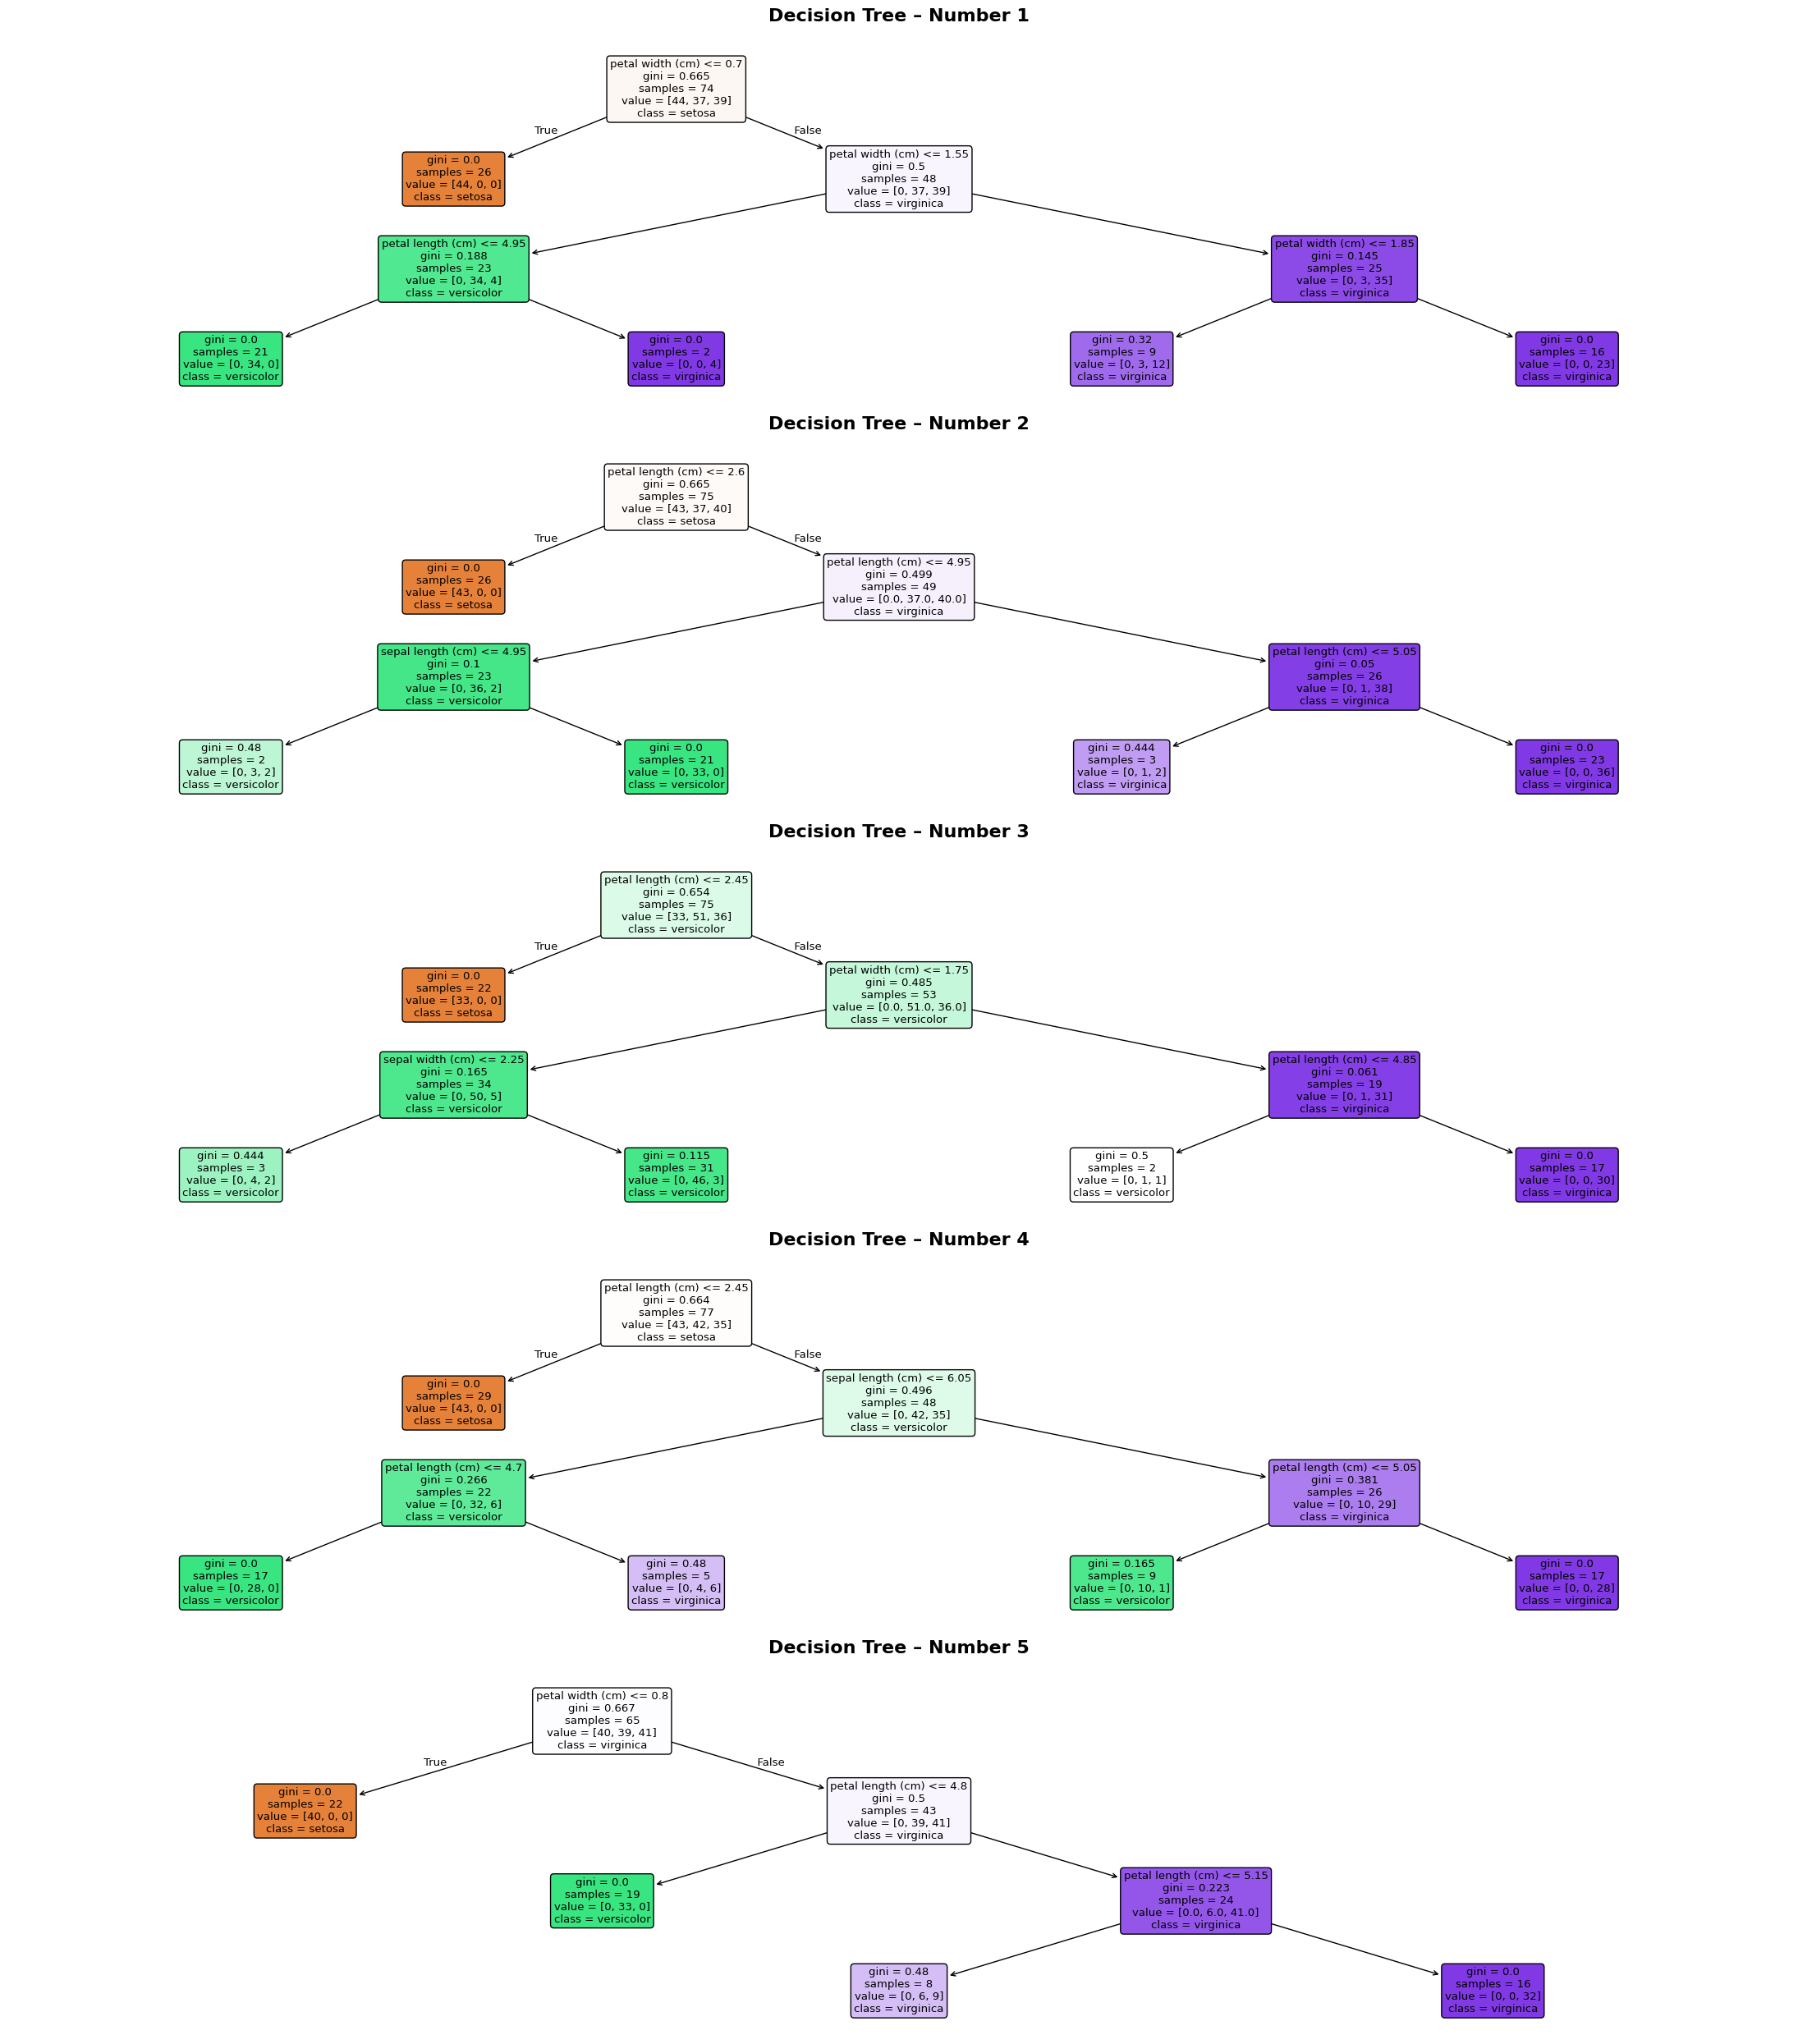

In [39]:
trees = rfc.estimators_[:5]

fig, axes = plt.subplots(5, 1, figsize=(22, 25))  # j'ai augmenté la hauteur pour que ça rentre

for i, tree in enumerate(trees):
    plot_tree(
        tree,
        ax=axes[i],
        filled=True,
        rounded=True,
        feature_names=iris.feature_names,
        class_names=iris.target_names
    )
    axes[i].set_title(f"Decision Tree – Number {i+1}", fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


**Q3.** Retrieve the feature importance for each feature. Which ones are the most important ? Does this match with what you observed in Q5 of Ex. 1 ?

In [43]:
import pandas as pd
importances = rfc.feature_importances_
feat_importances = pd.Series(importances, index=iris.feature_names)


feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances)



petal length (cm)    0.474226
petal width (cm)     0.415331
sepal length (cm)    0.097655
sepal width (cm)     0.012788
dtype: float64


**Q4.** Return the out-of-bag (OOB) error and recall how it is computed. Compare the performance of the random forest w.r.t. the decision trees studied in Ex. 1.

In [44]:
oob_error = 1 - rfc.oob_score_
print(f"OOB Error: {oob_error:.4f}")

OOB Error: 0.0583
